In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
oli = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\jainl\scikit_learn_data


In [3]:
olive = oli

In [5]:
olive.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [9]:
from pprint import pprint
print(olive.DESCR)

Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



In [10]:
olive['images'].shape

(400, 64, 64)

In [11]:
olive['data'].shape

(400, 4096)

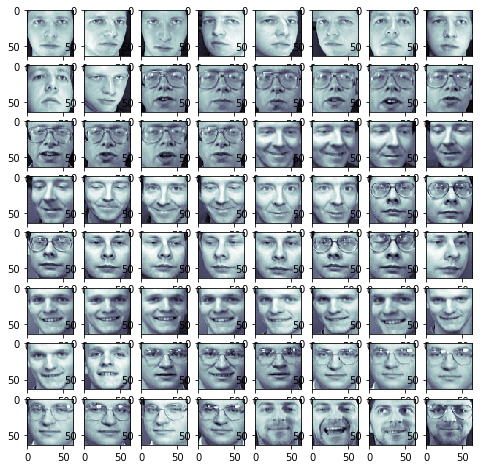

In [15]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    ax.imshow(olive['images'][i], cmap = plt.cm.bone)
plt.show()

In [16]:
X = olive.data
Y = olive.target

In [27]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
pca.components_.shape

(400, 4096)

In [29]:
total = sum(pca.explained_variance_)
k = 0
c_sum = 0
while c_sum/total < 0.95 :
    c_sum += pca.explained_variance_[k]
    k += 1
k

123

In [31]:
pca = PCA(n_components = k, whiten = True)
transformed_data = pca.fit_transform(X)
transformed_data.shape

(400, 123)

In [32]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [33]:
x_approx_images = x_approx.reshape((400, 64, 64))

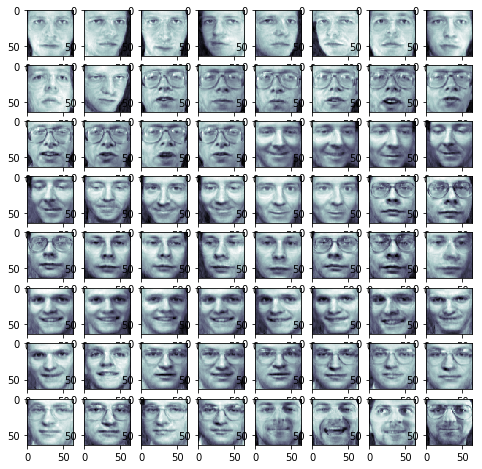

In [34]:

fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    ax.imshow(x_approx_images[i], cmap = plt.cm.bone)
plt.show()

In [35]:
eigen_vecs = pca.components_

In [36]:
eigen_faces = eigen_vecs.reshape((123, 64, 64))

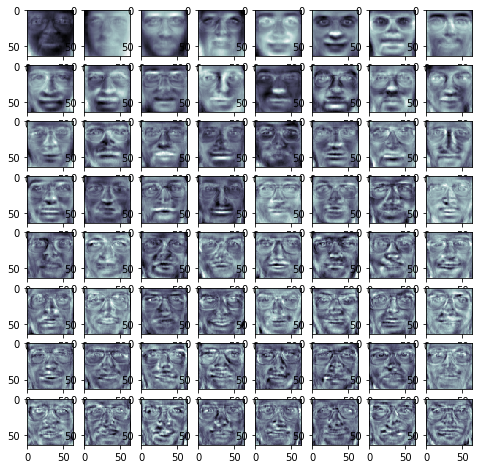

In [37]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    ax.imshow(eigen_faces[i], cmap = plt.cm.bone)
plt.show()